In [18]:
import glob
import logging
import pathlib
import pickle
import wget
import zipfile

import numpy as np
import pandas as pd
import scipy.io

from algo_ecg.data import _make_path
import os

import matplotlib.pyplot as plt


In [4]:
data_dir = "../data"
features_dir = "training2017"
labels_csv_file='REFERENCE-v3.csv' 

In [5]:
labels_index = {
    'N': 0,  # normal
    'A': 1,  # afib
}


In [6]:
data_dir_path = _make_path(data_dir)
#labels_file = data_dir_path / labels_csv_file
labels_file = os.path.join(data_dir, labels_csv_file)
labels_df = pd.read_csv(labels_file, header=None)
labels = labels_df.iloc[:, 1]
labels.index = labels_df.iloc[:, 0]
features_glob_pattern = str(data_dir_path / features_dir / '*.mat')
files = sorted(glob.glob(features_glob_pattern))


In [7]:
labels

0
A00001    N
A00002    N
A00003    N
A00004    A
A00005    A
         ..
A08524    N
A08525    O
A08526    N
A08527    N
A08528    N
Name: 1, Length: 8528, dtype: object

In [8]:
labels_file

'../data/REFERENCE-v3.csv'

In [9]:
len(files)

8528

In [10]:
f = files[3]
pid = pathlib.Path(f).stem
label = labels[pid]
int_label = labels_index[label]


In [11]:
f

'/Users/jessie/github_jhh/algo-ecg-deep-learning/notebooks/../data/training2017/A00004.mat'

In [12]:
pid

'A00004'

In [13]:
label

'A'

In [14]:
x_in = scipy.io.loadmat(f)['val'][0]

In [15]:
x_in

array([519, 619, 723, ..., 116,  17,  18], dtype=int16)

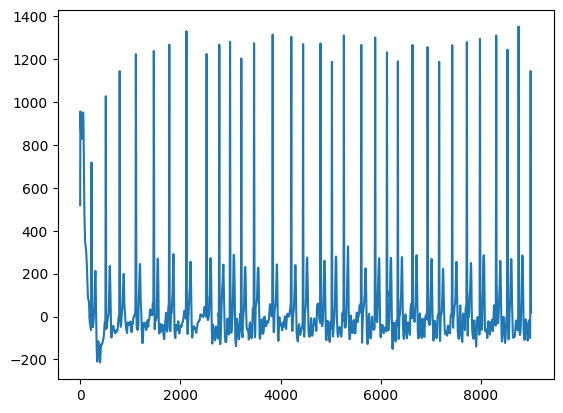

In [20]:
plt.plot(x_in)